In [51]:
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter



In [52]:
prods = []
titles = []
file = open('titles.txt', 'r', encoding='utf-8', errors= 'ignore')
for row in file:
    prods.append(row[:10])
    titles.append(row[11:-1])
file.close()

df_prods = pd.DataFrame({'ProductId': prods, 'Title': titles})

df_prods.head()

,ProductId,Title
0,B00308CJ12,Bulletproof Salesman (2008)
1,189138922X,Classical Mechanics
2,B0000CEP9J,Fiesta Black 464 7-1/4-inch Salad Plate
3,B000HRH6IA,Baby Blue Aurora Blue Gem Butterfly Belly Ring
4,B000002ERY,Predicciones Leo


In [53]:
df = pd.read_csv('Reviews.csv')
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [54]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [55]:
df['Content'] = df.Summary + ' ' + df.Text # Merging columns to make NLP easier

df = df.drop(['Summary', 'Text', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'ProfileName', 'Time', 'Id'], axis = 1).reset_index(drop = True) #Removing unnecessary columns

df['Sentiment'] = df.Score.apply(lambda x: -1 if x < 3 else (0 if x==3 else 1)) #Creating a column of categorical sentiments based on

In [56]:
df = df.merge(df_prods, how = 'inner')

df.describe()

,Score,Sentiment
count,101646.000000,101646.000000
mean,4.239931,0.659996
std,1.297328,0.707823
min,1.000000,-1.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [57]:
df.head()

,ProductId,UserId,Score,Content,Sentiment,Title
0,B000E7L2R4,A1MZYO9TZK0BBI,5,Yay Barley Right now I'm mostly just sprouting...,1,Organic Sprouting Barley Grass Seed - 9 lb
1,B0001PB9FE,A3HDKO7OW0QNK4,5,The Best Hot Sauce in the World I don't know i...,1,Original Tequila Picante Gourmet de Inclan - 5 OZ
2,B0009XLVG0,A2725IB4YY9JEB,5,"My cats LOVE this ""diet"" food better than thei...",1,Felidae Dry Cat Food for Senior and Overweight...
3,B0009XLVG0,A327PCT23YH90,1,My Cats Are Not Fans of the New Food My cats h...,-1,Felidae Dry Cat Food for Senior and Overweight...
4,B0001PB9FY,A3HDKO7OW0QNK4,5,The Best Hot Sauce in the World I don't know i...,1,Original Tequila Picante Gourmet de Inclan - C...


<AxesSubplot:ylabel='Frequency'>

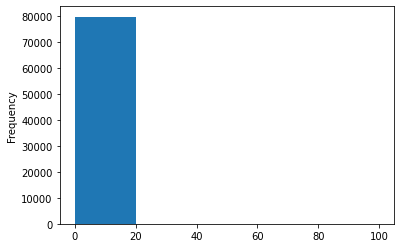

In [58]:
user_count = df.UserId.value_counts()

user_count.plot.hist(bins = 5, range = (0, 100))

<AxesSubplot:ylabel='Frequency'>

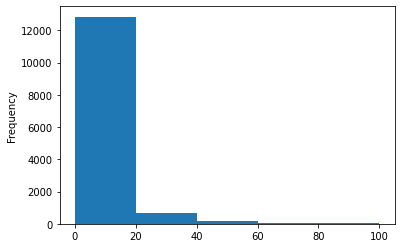

In [59]:
product_count = df.ProductId.value_counts()

product_count.plot.hist(bins = 5, range = (0, 100))

In [60]:
file = open('categories.txt', 'r', encoding='utf-8', errors= 'ignore')
arr = file.readlines()

len(arr)

7313587

In [61]:
prods = []
categories = []

for i in (range(len(arr))):
    if arr[i][0] != ' ':
        if arr[i + 1][0] == ' ':
            prods.append(arr[i][:10])
            categories.append(arr[i + 1][:-1])

#

print(len(prods), len(categories))

2441053 2441053


In [62]:
cats = pd.DataFrame({'ProductId': prods, 'Categories': categories})
cats.head()

,ProductId,Categories
0,B0027DQHA0,"Movies & TV, TV"
1,0756400120,"Books, Literature & Fiction, Anthologies & L..."
2,B0000012D5,"Music, Blues"
3,B00024YAOQ,"Books, Business & Investing, Business Life, ..."
4,068413263X,Books


In [63]:
temp = cats['Categories'].str.split(',', expand = True)

temp.head()


Exception ignored in: <function tqdm.__del__ at 0x12480d5e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/usr/local/lib/python3.9/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


,0,1,2,3,4,5,6,7
0,Movies & TV,TV,None,None,None,None,None,None
1,Books,Literature & Fiction,Anthologies & Literary Collections,General,None,None,None,None
2,Music,Blues,None,None,None,None,None,None
3,Books,Business & Investing,Business Life,Motivation & Self-Improvement,None,None,None,None
4,Books,None,None,None,None,None,None,None


In [64]:
cats['Category'] = temp[1]
cats.head()


,ProductId,Categories,Category
0,B0027DQHA0,"Movies & TV, TV",TV
1,0756400120,"Books, Literature & Fiction, Anthologies & L...",Literature & Fiction
2,B0000012D5,"Music, Blues",Blues
3,B00024YAOQ,"Books, Business & Investing, Business Life, ...",Business & Investing
4,068413263X,Books,None


In [65]:
df = df.merge(cats[['ProductId', 'Category']], how = 'inner')

df.describe()

,Score,Sentiment
count,101646.000000,101646.000000
mean,4.239931,0.659996
std,1.297328,0.707823
min,1.000000,-1.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [66]:
df.head()

,ProductId,UserId,Score,Content,Sentiment,Title,Category
0,B000E7L2R4,A1MZYO9TZK0BBI,5,Yay Barley Right now I'm mostly just sprouting...,1,Organic Sprouting Barley Grass Seed - 9 lb,Lawn & Garden
1,B0001PB9FE,A3HDKO7OW0QNK4,5,The Best Hot Sauce in the World I don't know i...,1,Original Tequila Picante Gourmet de Inclan - 5 OZ,Pantry Staples
2,B0009XLVG0,A2725IB4YY9JEB,5,"My cats LOVE this ""diet"" food better than thei...",1,Felidae Dry Cat Food for Senior and Overweight...,Cats
3,B0009XLVG0,A327PCT23YH90,1,My Cats Are Not Fans of the New Food My cats h...,-1,Felidae Dry Cat Food for Senior and Overweight...,Cats
4,B0001PB9FY,A3HDKO7OW0QNK4,5,The Best Hot Sauce in the World I don't know i...,1,Original Tequila Picante Gourmet de Inclan - C...,Pantry Staples


In [67]:
df.to_csv('title_category.csv')

In [71]:
import ntlk


ModuleNotFoundError: No module named 'ntlk'